<a href="https://colab.research.google.com/github/iamr7d/Auto_encoders/blob/main/basics_of_auto_encoders_using_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Define Encoder
latent_dim = 2  # Dimensionality of latent space for visualization
encoder_input = layers.Input(shape=(28, 28, 1))
x = layers.Flatten()(encoder_input)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
latent_space = layers.Dense(latent_dim)(x)
encoder = models.Model(encoder_input, latent_space, name="encoder")

In [6]:
# Define Decoder
decoder_input = layers.Input(shape=(latent_dim,))
x = layers.Dense(64, activation="relu")(decoder_input)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(28 * 28, activation="sigmoid")(x)
decoder_output = layers.Reshape((28, 28, 1))(x)
decoder = models.Model(decoder_input, decoder_output, name="decoder")

In [7]:
# Define Autoencoder
autoencoder_input = encoder_input
autoencoder_output = decoder(encoder(autoencoder_input))
autoencoder = models.Model(autoencoder_input, autoencoder_output, name="autoencoder")
autoencoder.compile(optimizer="adam", loss="mse")

In [8]:
# Train Autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1024 - val_loss: 0.0566
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0551 - val_loss: 0.0521
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0508 - val_loss: 0.0472
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0468 - val_loss: 0.0453
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0452 - val_loss: 0.0444
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0442 - val_loss: 0.0437
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0435 - val_loss: 0.0430
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0429 - val_loss: 0.0425
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0422 - val_loss: 0.0419
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0416 - val_loss: 0.0415


In [9]:
# Get Latent Space Representation
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


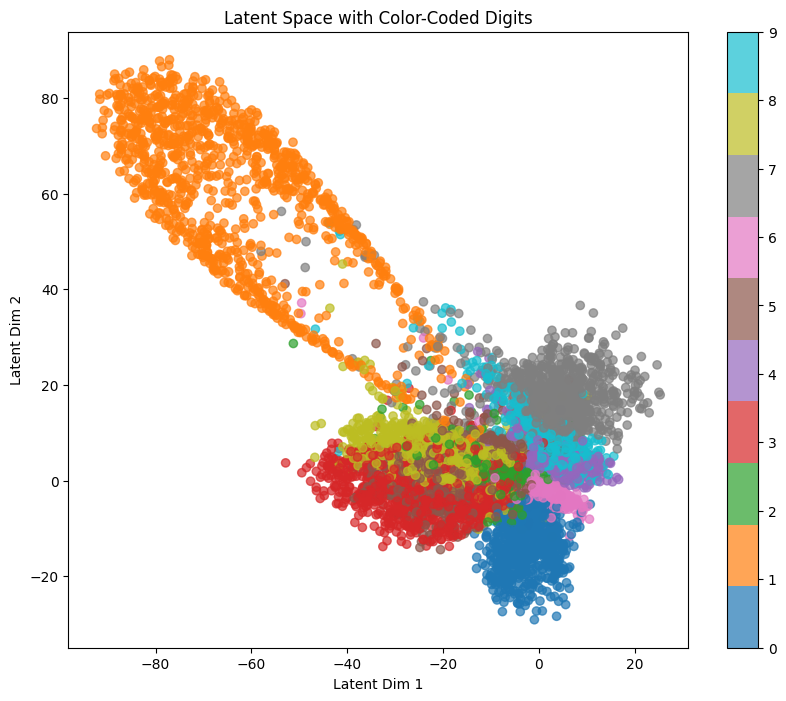

In [10]:
# Visualization 1: Latent Space with Color-coded Digits
def plot_latent_space(latent_space, labels):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(latent_space[:, 0], latent_space[:, 1], c=labels, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter)
    plt.xlabel("Latent Dim 1")
    plt.ylabel("Latent Dim 2")
    plt.title("Latent Space with Color-Coded Digits")
    plt.show()

plot_latent_space(encoded_imgs, y_test)

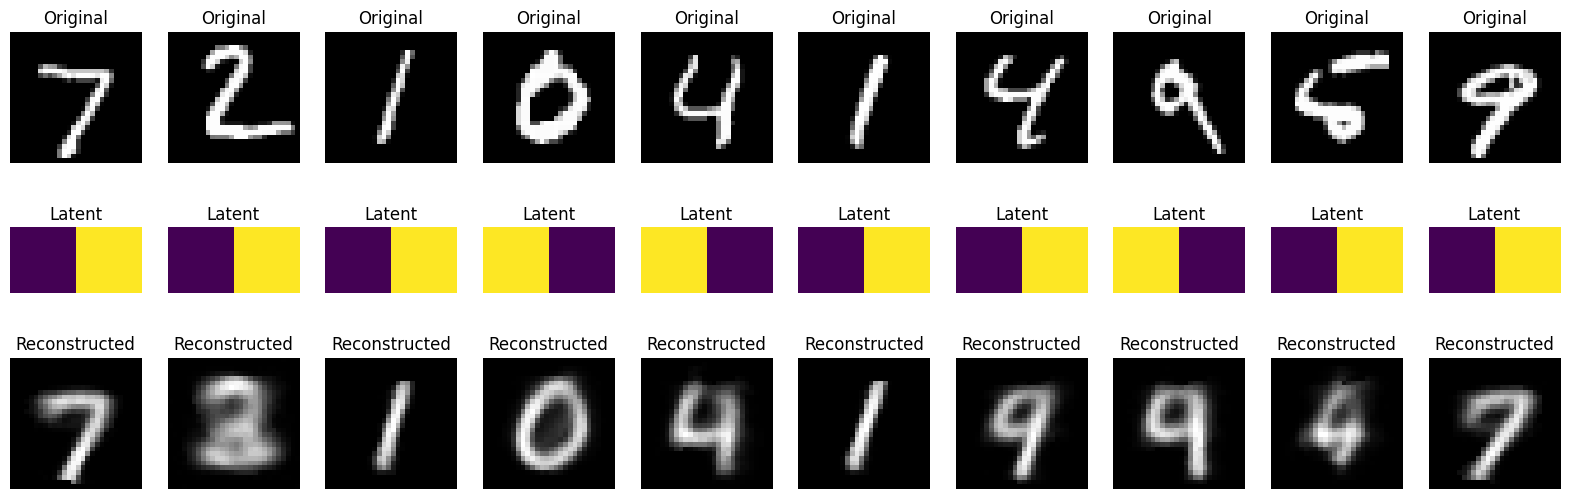

In [15]:
# Visualization 2: Data at Different Stages
n = 10  # Number of samples to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Display Encoded (Latent Space)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(1, -1), cmap="viridis")
    plt.title("Latent")
    plt.axis("off")

    # Display Reconstructed
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error

# Flatten images to compute MSE
x_test_flat = x_test.reshape(len(x_test), -1)
decoded_imgs_flat = decoded_imgs.reshape(len(decoded_imgs), -1)

# Calculate MSE across the test set
reconstruction_loss = mean_squared_error(x_test_flat, decoded_imgs_flat)
print(f"Reconstruction Loss (MSE) on Test Set: {reconstruction_loss:.4f}")

Reconstruction Loss (MSE) on Test Set: 0.0415
